In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)


In [2]:
#ratings of people 
data1 = pd.read_csv(
    '../annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv',
    sep = r',', 
    skipinitialspace = True
)

data2 = pd.read_csv(
    '../annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_2000_2058.csv',
    sep = r',', 
    skipinitialspace = True
)


val= data1['valence_mean'].append(data2['valence_mean'], ignore_index = True)
aro= data1['arousal_mean'].append(data2['arousal_mean'], ignore_index = True)

filenames = os.listdir("../features")


In [3]:
annotation_1 = data1[["song_id", "valence_mean","arousal_mean"]] #45 sec
annotation_2 = data2[["song_id", "valence_mean","arousal_mean"]] #>45 sec

In [4]:
df_final=pd.DataFrame()

for file in filenames:
    pathFeat = "../features/"+file
    if (file[:-4].isnumeric() == True and int(file[:-4]) <= 2000):
        shuffled = pd.read_csv(pathFeat, delimiter=";").iloc[30:90].sample(frac=1)
        v1=annotation_1["valence_mean"].loc[annotation_1['song_id'] == int(file[:-4])].iloc[0]
        a1=annotation_1["arousal_mean"].loc[annotation_1['song_id'] == int(file[:-4])].iloc[0]
        shuffled["valence"]=v1 
        shuffled["arousal"]=a1    
        shuffled = shuffled.drop('frameTime', axis=1)
        result = np.array_split(shuffled, 4)
        for i in range(len(result)):
            df_final = df_final.append(pd.DataFrame(np.mean(result[i])).T)
df_final = df_final.sample(frac=1).reset_index().drop(["index"], axis=1)

In [5]:
df_final.shape

(6976, 262)

In [6]:
df_final.to_csv('preprocessed.csv', index=False)

In [7]:
df1=pd.read_csv('preprocessed.csv') #Read again just to verify

In [8]:
df1 #data is as expected

,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,shimmerLocal_sma_amean,...,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean,valence,arousal
0,33.944790,58.291592,0.088362,0.667641,0.082415,0.052710,0.069692,0.038885,0.130580,0.135166,...,2.152302,-0.000100,1.552407,0.007142,1.583217,-0.010085,1.214804,-0.008316,6.3,6.6
1,39.644935,80.924001,0.050040,0.745088,0.149565,0.100754,0.133914,0.111849,0.153101,0.204842,...,2.119356,-0.015019,1.978713,-0.040132,1.698889,-0.020037,1.615719,0.040630,6.6,4.6
2,83.711152,98.950914,0.041189,0.730341,0.162976,0.094878,0.139964,0.085550,0.111033,0.106860,...,2.503658,-0.017501,2.322979,-0.053300,2.162089,-0.005603,2.041472,-0.016049,6.5,5.6
3,63.588339,125.179873,0.026796,0.768580,0.111450,0.085113,0.126286,0.094701,0.100645,0.170027,...,2.514332,0.026747,2.254891,0.035028,2.106257,-0.014109,2.113567,-0.021796,3.5,3.5
4,36.599783,71.158424,0.067100,0.508561,0.106930,0.085890,0.107002,0.097820,0.074099,0.109730,...,1.797538,-0.010279,1.805352,0.024496,1.573414,0.020930,1.450232,-0.031164,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,72.611186,107.249953,0.036144,0.767177,0.145116,0.094217,0.156363,0.102226,0.157914,0.197336,...,2.486444,0.045529,2.340305,-0.024024,2.193599,-0.066075,1.835999,-0.017242,5.4,3.0
6972,72.515451,230.432064,0.047760,0.795965,0.083641,0.075010,0.090017,0.078320,0.085847,0.170420,...,2.041831,-0.013817,1.779278,-0.028251,1.703905,-0.023410,1.616896,-0.006538,4.8,4.5
6973,18.200546,99.609752,0.030406,0.780950,0.154953,0.129590,0.164882,0.138884,0.188885,0.248680,...,2.218939,-0.002491,2.048535,0.076255,1.785098,0.039146,1.722232,0.003705,3.5,5.2
6974,39.079782,88.702682,0.024985,0.757899,0.140199,0.086890,0.148066,0.093157,0.127035,0.144651,...,1.695252,-0.022888,1.645060,-0.009185,1.461475,0.020115,1.314551,0.021153,4.1,5.9


In [9]:
# Start of the PCA feature selection


#print(df1.columns.tolist())

from sklearn.datasets import load_iris


# valence_only = df1.loc[:, df1.columns != 'arousal']
# arousal_only = df1.loc[:, df1.columns != 'valence']

# print(valence_only.values.shape)


# training_data
# testing_data
# X_train_valence, X_test_valence, y_train, y_test = train_test_split(X, y, test_size = 0.4)

data_raw = df1.values # dataframe to ndarray
print(data_raw.shape)

truth_val = data_raw[:, (data_raw.shape[1]-2): data_raw.shape[1]] # true valence and arousal values

data = data_raw[:, 0: (data_raw.shape[1] - 2)] # feature data
print(data.shape)


(6976, 262)
(6976, 260)


(45, 260)
[0.29043827 0.08583151 0.06670712 0.0588164  0.0464115  0.04085041
 0.03107585 0.02703152 0.02185162 0.01814605 0.01663975 0.01475295
 0.01353698 0.01077834 0.00981298 0.00957327 0.00812872 0.00744292
 0.00737117 0.00716338 0.00635549 0.00619823 0.00593237 0.00585993
 0.0058056  0.0055734  0.0052778  0.004974   0.00494204 0.00468304
 0.00464962 0.00437471 0.0041748  0.00413149 0.00402674 0.00378237
 0.00364331 0.00348567 0.00335992 0.0032153  0.00314096 0.00307378
 0.00300301 0.00294238 0.00291422]


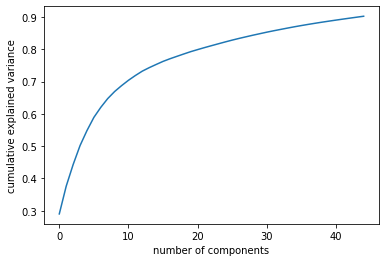

In [10]:
x = StandardScaler().fit_transform(data) # normalizing the features, since PCA is scale-sensitive.
np.mean(x),np.std(x) #should be 0 and 1
pca_analysis = PCA(0.90)
principalComponents_PCA = pca_analysis.fit_transform(x)
print(pca_analysis.components_.shape)
print(pca_analysis.explained_variance_ratio_)
#There are 42 top features that retain 90% of the variance.
plt.plot(np.cumsum(pca_analysis.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
#Lasso regression
x = df1.drop(columns=['valence', 'arousal'],axis=1).values
print(data.shape)
y1 = df1['valence'].values
y2 = df1['arousal'].values
print(y1.shape, y2.shape)
#End of PCA feature selection

(6976, 260)
(6976,) (6976,)


In [12]:
# Start of Lasso feature selection


from sklearn.linear_model import Lasso
names = df1.drop(columns=['valence', 'arousal'],axis=1).columns
print(names)

Index(['F0final_sma_stddev', 'F0final_sma_amean',
       'voicingFinalUnclipped_sma_stddev', 'voicingFinalUnclipped_sma_amean',
       'jitterLocal_sma_stddev', 'jitterLocal_sma_amean',
       'jitterDDP_sma_stddev', 'jitterDDP_sma_amean',
       'shimmerLocal_sma_stddev', 'shimmerLocal_sma_amean',
       ...
       'pcm_fftMag_mfcc_sma_de[10]_stddev', 'pcm_fftMag_mfcc_sma_de[10]_amean',
       'pcm_fftMag_mfcc_sma_de[11]_stddev', 'pcm_fftMag_mfcc_sma_de[11]_amean',
       'pcm_fftMag_mfcc_sma_de[12]_stddev', 'pcm_fftMag_mfcc_sma_de[12]_amean',
       'pcm_fftMag_mfcc_sma_de[13]_stddev', 'pcm_fftMag_mfcc_sma_de[13]_amean',
       'pcm_fftMag_mfcc_sma_de[14]_stddev',
       'pcm_fftMag_mfcc_sma_de[14]_amean'],
      dtype='object', length=260)


In [13]:
#lasso on valence
lasso = Lasso(alpha=0.1, max_iter=10000) # maximum iteration 10000
lasso_coef_valence = lasso.fit(x,y1).coef_

<function matplotlib.pyplot.show(close=None, block=None)>

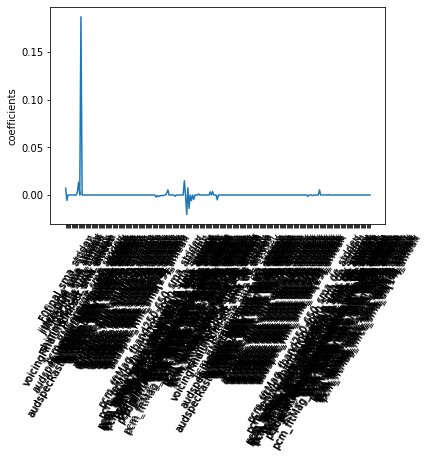

In [14]:
_=plt.plot(range(len(names)),lasso_coef_valence)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel("coefficients")
plt.show
# some features have higher coefficients than others
# ignore the feature labels. 
# plot is just for understanding the effects of different features.

In [15]:
print(lasso_coef_valence.shape)
coef_indx_sorted_val = np.argsort(lasso_coef_valence)
max_indx_val = coef_indx_sorted_val[(coef_indx_sorted_val.shape[0]-5): coef_indx_sorted_val.shape[0]]
max_indx_val = np.flip(max_indx_val) # indices of top 5 co-efficient
top_coefficient_val = lasso_coef_valence[max_indx_val]
top_features_val = x[:,max_indx_val] # our expected data with top 5 features for valence
top_features_name_val = names[max_indx_val]
print(top_features_val.shape)
print(top_features_name_val)
print(max_indx_val)

(260,)
(6976, 5)
Index(['audspec_lengthL1norm_sma_amean',
       'pcm_fftMag_spectralHarmonicity_sma_amean', 'logHNR_sma_amean',
       'pcm_fftMag_mfcc_sma[2]_stddev', 'F0final_sma_stddev'],
      dtype='object')
[ 13 101  11 104   0]


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (260).

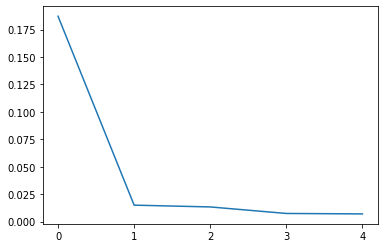

In [16]:
_=plt.plot(range(len(top_features_name_val)),top_coefficient_val)
_=plt.xticks(range(len(top_features_name_val)),names,rotation=60)
_=plt.ylabel("coefficients")
plt.show

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+00, tolerance: 1.159e+00
  model = cd_fast.enet_coordinate_descent(


<function matplotlib.pyplot.show(close=None, block=None)>

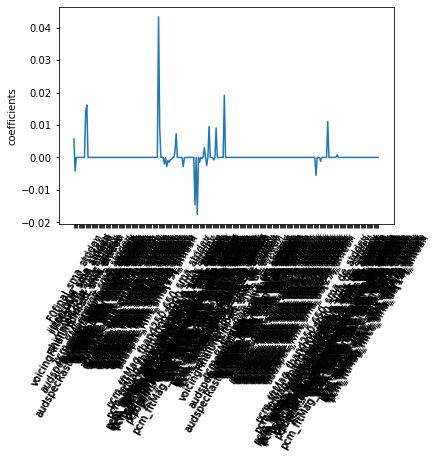

In [17]:
#lasso on arousal
lasso1 = Lasso(alpha=0.1, max_iter=10000)
lasso_coef_arousal = lasso1.fit(x,y2).coef_

_=plt.plot(range(len(names)),lasso_coef_arousal)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel("coefficients")
plt.show
# some features has higher coefficients thatn others
# ignore the feature labels. 
# plot is just for understanding the effects of different features.

In [18]:
print(lasso_coef_arousal.shape)
coef_indx_sorted_arousal = np.argsort(lasso_coef_arousal)
max_indx_arousal = coef_indx_sorted_arousal[(coef_indx_sorted_arousal.shape[0]-5): coef_indx_sorted_arousal.shape[0]]
max_indx_arousal = np.flip(max_indx_arousal) # indices of top 5 co-efficient
top_coefficient_arousal = lasso_coef_arousal[max_indx_arousal]
top_features_arousal = x[:,max_indx_arousal] # our expected data with top 5 features for arousal
top_features_name_arousal = names[max_indx_arousal]
print(top_features_arousal.shape)
print(top_features_name_arousal)
print(max_indx_arousal)

(260,)
(6976, 5)
Index(['pcm_fftMag_fband250-650_sma_stddev', 'pcm_fftMag_mfcc_sma[14]_stddev',
       'logHNR_sma_amean', 'logHNR_sma_stddev',
       'pcm_fftMag_spectralCentroid_sma_de_stddev'],
      dtype='object')
[ 72 128  11  10 216]


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (260).

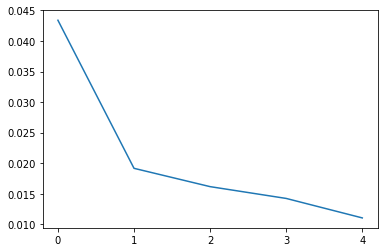

In [19]:
_=plt.plot(range(len(top_features_name_arousal)),top_coefficient_arousal)
_=plt.xticks(range(len(top_features_name_arousal)),names,rotation=60)
_=plt.ylabel("coefficients for arousal")
plt.show
# Although the feature names are same but they are different from the
# feature names that we got for valence.
# Notices that the index are different, so they indicate different features

In [20]:
# After lasso we get our data with top 5 effective features for valence
#print(top_features_val)
print(top_features_val.shape)
# After lasso we get our data with top 5 effective features for valence
#print(top_features_arousal)
print(top_features_arousal.shape)

(6976, 5)
(6976, 5)


In [21]:
print(top_features_name_arousal)

Index(['pcm_fftMag_fband250-650_sma_stddev', 'pcm_fftMag_mfcc_sma[14]_stddev',
       'logHNR_sma_amean', 'logHNR_sma_stddev',
       'pcm_fftMag_spectralCentroid_sma_de_stddev'],
      dtype='object')


(6976, 260)
(6976,) (6976,)
Top 5 Features - Valence Prediction
Mean Absolute Error: 0.8001262817672541
Mean Squared Error: 1.0301478419625671
Root Mean Squared Error: 1.0149619904028757
Actual mean value: 4.93971346704871


Top 5 Features - Arousal Prediction
Mean Absolute Error: 0.8983165336507845
Mean Squared Error: 1.225361975394998
Root Mean Squared Error: 1.1069606927958182
Actual mean value: 4.788882521489972


(6976, 45)
Top 42 PCA - Components - Valence Prediction
Mean Absolute Error: 0.7029048430050198
Mean Squared Error: 0.8108124219128914
Root Mean Squared Error: 0.900451232390123
Actual mean value: 4.93971346704871


Top 42 PCA - Components - Arousal Prediction
Mean Absolute Error: 0.7933218862925222
Mean Squared Error: 0.9896627845028264
Root Mean Squared Error: 0.994817965510689
Actual mean value: 4.788882521489972




array([5.74319416, 5.97630379, 5.43122076, ..., 4.0864921 , 5.32722927,
       4.82072475])

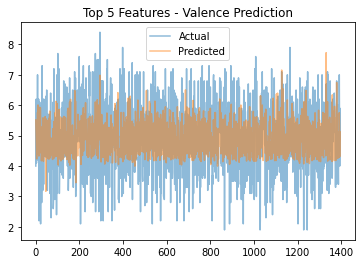

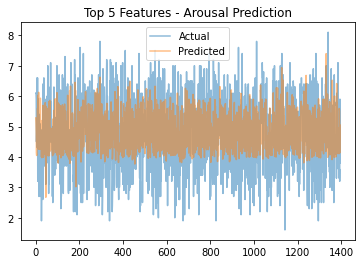

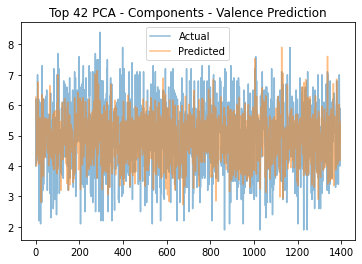

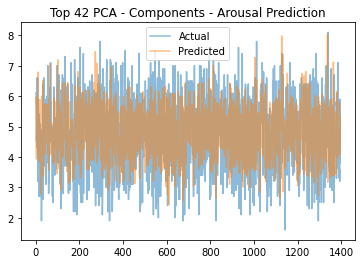

In [22]:
# Do regression predictions using both the top 42 features from PCA and the top 5 features from
# lasso regression and see which performs better.

# First with the top 5 features...
x = df1.drop(columns=['valence', 'arousal'],axis=1).values
print(data.shape)
y1 = df1['valence'].values
y2 = df1['arousal'].values
print(y1.shape, y2.shape)

from sklearn.model_selection import train_test_split

#X = df1.drop(columns=['valence', 'arousal'],axis=1).values

# Top 5 columns:
X_top5 = df1[top_features_name_arousal]

y_valence = df1['valence'].values
y_arousal = df1['arousal'].values

def run_regression(X, y, title=''):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # coeff_df = pd.DataFrame(reg.coef_, X_top5.columns, columns=['Coefficient'])
    y_pred = regressor.predict(X_test)
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print (title)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print (f"Actual mean value: {y_test.mean()}")
    print ("\n")
    comparison_df.plot(alpha=0.5, title=title)
    return y_pred

# Top 5 Features - Valence - Linear Regression
run_regression(X_top5.values, y_valence, title='Top 5 Features - Valence Prediction')

# Top 5 Features - Arousal - Linear Regression
run_regression(X_top5.values, y_arousal, title='Top 5 Features - Arousal Prediction')

# PCA-Based
X_pca = principalComponents_PCA
print (X_pca.shape)

# Top 42 PCA Components - Valence - Linear Regression
run_regression(X_pca, y_valence, title='Top 42 PCA - Components - Valence Prediction')

# Top 42 PCA Components - Arousal - Linear Regression
run_regression(X_pca, y_arousal, title='Top 42 PCA - Components - Arousal Prediction')

In [23]:
print('Dimensions of just arousal y vals: ', y_arousal.shape)  # dims of 1D true outputs

#print(y_valence)        # check values of y arrays ...
#print(y_arousal)
#print()
y_valence_arousal = np.vstack([y_valence, y_arousal]).T # staple y arrays together [[valence, arousal], [], ...]

#print(y_valence_arousal)
print('Dimensions of combined [valence, arousal] y: ', y_valence_arousal.shape)

Dimensions of just arousal y vals:  (6976,)
Dimensions of combined [valence, arousal] y:  (6976, 2)


In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Configure neural net (note first layer with input dimension of 5)
kmodel = Sequential()
kmodel.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'))
kmodel.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
# Output layer has 1 output - because right now just training for valence / arousal alone:
kmodel.add(Dense(1, kernel_initializer='normal'))

# Compile the model, using MSE as loss metric
kmodel.compile(loss='mean_squared_error', optimizer='adam')

2022-04-25 12:10:01.567688: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# Method for testing NN model
def run_and_plot_neuralnet(X, y, title='', batches=15, num_epochs=50):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # print(y_train.shape)
    kmodel.fit(x_train, y_train , batch_size = batches, epochs = num_epochs, verbose=0)

    y_pred = kmodel.predict(x_test)
    # comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    print('\n' + title)
    print(' - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print(' - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print(' - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("\n")

    #plt.scatter(y_pred)
    #plt.show()
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))  # Return MSE for testing

In [27]:
# Run using Top 5 identified features, valence and arousal modeled seperately:
# Top 5 Features - Valence - Linear Regression
run_and_plot_neuralnet(X_top5.values, y_valence, title='Top 5 Features - Valence Prediction via NN', num_epochs=10)
# Top 5 Features - Arousal - Linear Regression
run_and_plot_neuralnet(X_top5.values, y_arousal, title='Top 5 Features - Arousal Prediction via NN', num_epochs=10)


Top 5 Features - Valence Prediction via NN
 - Mean Absolute Error: 0.7574644753447918
 - Mean Squared Error: 0.9330796386698265
 - Root Mean Squared Error: 0.9659604746933627



Top 5 Features - Arousal Prediction via NN
 - Mean Absolute Error: 0.8447238447877944
 - Mean Squared Error: 1.1061362118936109
 - Root Mean Squared Error: 1.051730104111131




1.051730104111131

In [28]:
# Reconfigure neural net for PCA features (first layer now with input dimension of 45 to adapt to components)
kmodel = Sequential()
kmodel.add(Dense(units=15, input_dim=45, kernel_initializer='normal', activation='relu'))
kmodel.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
kmodel.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
# Output layer has 1 output - TODO modify to have one for valence and one for arousal:
kmodel.add(Dense(1, kernel_initializer='normal'))

# Compile the model, using MSE as loss metric
kmodel.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
# Run using PCA features, one train for valence and one train for arousal:   # print (X_pca.shape)
# Top 42 PCA Components - Valence - Linear Regression
run_and_plot_neuralnet(X_pca, y_valence, title='Top 42 PCA - Components - Valence Prediction via NN', num_epochs=10)
# Top 42 PCA Components - Arousal - Linear Regression
run_and_plot_neuralnet(X_pca, y_arousal, title='Top 42 PCA - Components - Arousal Prediction via NN', num_epochs=10)


Top 42 PCA - Components - Valence Prediction via NN
 - Mean Absolute Error: 0.7007074716166302
 - Mean Squared Error: 0.8132356713410105
 - Root Mean Squared Error: 0.9017958035725219



Top 42 PCA - Components - Arousal Prediction via NN
 - Mean Absolute Error: 0.7460606268825367
 - Mean Squared Error: 0.8819830774102297
 - Root Mean Squared Error: 0.9391395409683428




0.9391395409683428

### Now with valence and arousal output from same neural net:

In [30]:
# Test with 2 output neurons, valence and arousal in same neural net
kmodel = Sequential()
kmodel.add(Dense(units=30, input_dim=45, kernel_initializer='normal', activation='relu'))
kmodel.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
# Output layer has 2 outputs - one for valence and one for arousal:
kmodel.add(Dense(2, kernel_initializer='normal'))

# Compile the model, using MSE as loss metric
kmodel.compile(loss='mean_squared_error', optimizer='adam')

### Use grid test to identify optimal hyperparams (batch size and epochs for training)

In [31]:
# Identify optimal epoch count and batch size to train NN. Takes a pretty long time to run
optimal_epoch = 10
optimal_batch = 20

# Epoch count and batch sizes to try
test_epochs = [10, 15, 20]
test_batches = [5, 10, 15, 20]

lowest_loss = 99999
for eT in test_epochs:
    for bT in test_batches:
        print('Testing', eT, 'epochs,', bT, 'batches...')
        title_curr =  str(('Valence/Arousal w/', eT, 'ep,', bT, 'b'))
        loss = run_and_plot_neuralnet(X_pca, y_valence_arousal, title=title_curr, num_epochs=eT, batches=bT)
        if loss < lowest_loss:
            lowest_loss = loss
            optimal_epoch = eT
            optimal_batch = bT

print('Done. Optimal parameters from possibilities:')
print('  - Epochs:', optimal_epoch, ' Batches:', optimal_batch)

Testing 10 epochs, 5 batches...

('Valence/Arousal w/', 10, 'ep,', 5, 'b')
 - Mean Absolute Error: 0.7170259037946911
 - Mean Squared Error: 0.8209950247745267
 - Root Mean Squared Error: 0.9060877577666121


Testing 10 epochs, 10 batches...

('Valence/Arousal w/', 10, 'ep,', 10, 'b')
 - Mean Absolute Error: 0.7102974115128509
 - Mean Squared Error: 0.8156299520121668
 - Root Mean Squared Error: 0.903122335020105


Testing 10 epochs, 15 batches...

('Valence/Arousal w/', 10, 'ep,', 15, 'b')
 - Mean Absolute Error: 0.7150628820223935
 - Mean Squared Error: 0.8280994395522765
 - Root Mean Squared Error: 0.9099996920616383


Testing 10 epochs, 20 batches...

('Valence/Arousal w/', 10, 'ep,', 20, 'b')
 - Mean Absolute Error: 0.7131359812386746
 - Mean Squared Error: 0.8294676327794033
 - Root Mean Squared Error: 0.9107511365787052


Testing 15 epochs, 5 batches...

('Valence/Arousal w/', 15, 'ep,', 5, 'b')
 - Mean Absolute Error: 0.7192469112818429
 - Mean Squared Error: 0.8537104697716971

In [54]:
# Redeclare Method for testing NN model, returns y test and y pred now
def run_and_plot_neuralnet(X, y, title='', batches=15, num_epochs=50, model=kmodel):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(x_train, y_train , batch_size = batches, epochs = num_epochs, verbose=0)

    y_pred = model.predict(x_test)

    print('\n' + title)
    print(' - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print(' - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print(' - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("\n")

    return y_test, y_pred # Return predictions for comparison

In [47]:
# Run using 42 PCA features and optimal epoch / batch values:
yvals = run_and_plot_neuralnet(X_pca, y_valence_arousal, title='Top 42 PCA - Components - Valence/Arousal Prediction via NN', num_epochs=10, batches=5)
# print(yvals[0])
# print(yvals[1])

(5580, 45)
(1396, 45)
(5580, 2)
(1396, 2)

Top 42 PCA - Components - Valence/Arousal Prediction via NN
 - Mean Absolute Error: 0.7368322488435022
 - Mean Squared Error: 0.9013880567047041
 - Root Mean Squared Error: 0.9494145863134315




Text(0, 0.5, 'arousal')

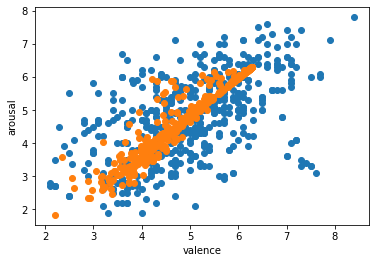

In [39]:
# Plot up to n_samples examples from model classifications
n_samples = 500

plt.scatter(*yvals[0][:n_samples].T)
plt.scatter(*yvals[1][:n_samples].T)
plt.xlabel('valence')
plt.ylabel('arousal')

## Try training Neural Net with ALL available parameters

In [130]:
print("Full X shape:", x.shape)
# Reconfigure neural net for all features (first layer now with input dimension of x.shape[1] to adapt to components)
all_kmodel = Sequential()
all_kmodel.add(Dense(units=250, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
all_kmodel.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
# all_kmodel.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))
# Output layer has 2 outputs - one for valence and one for arousal:
all_kmodel.add(Dense(2, kernel_initializer='normal'))
# Compile the model, using MSE as loss metric
all_kmodel.compile(loss='mean_squared_error', optimizer='adam')
print(all_kmodel.summary())

Full X shape: (6976, 260)
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 250)               65250     
                                                                 
 dense_115 (Dense)           (None, 200)               50200     
                                                                 
 dense_116 (Dense)           (None, 2)                 402       
                                                                 
Total params: 115,852
Trainable params: 115,852
Non-trainable params: 0
_________________________________________________________________
None



All 260 features - Valence/Arousal Prediction via NN
 - Mean Absolute Error: 0.7313165175504881
 - Mean Squared Error: 0.8758634497688883
 - Root Mean Squared Error: 0.9358757662045152




Text(0, 0.5, 'arousal')

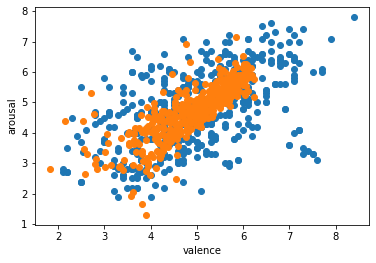

In [145]:
from sklearn.preprocessing import normalize
# Run using all 260 features and testing epoch / batch values:
norm_all_x = (normalize(x))
all_yvals = run_and_plot_neuralnet(norm_all_x, y_valence_arousal, title='All 260 features - Valence/Arousal Prediction via NN',
                                   num_epochs=70, batches=15, model=all_kmodel)

plt.scatter(*all_yvals[0][:n_samples].T)
plt.scatter(*all_yvals[1][:n_samples].T)
plt.xlabel('valence')
plt.ylabel('arousal')

In [286]:

#NEURAL NETWORKS
#https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
#https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python